    Jacob Knopping
    1/2/2020
    
### 16.5 ASSIGNMENT: DATA EXPLORATION I

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

    1) Derive the descriptive statistics of the data and discuss the points you find remarkable.
    2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
    3) In your chosen state, which of the lessons are the students more successful, math or reading?
    4) What are the distributions of the math and reading scores in the sample?
    5) Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [1]:
#USING CODE FOR DATA CLEANING FROM EARLIER:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

__1) Derive the descriptive statistics of the data and discuss the points you find remarkable.__

In [2]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [3]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


Thinkful:

    "Average TOTAL_REVENUE is less than TOTAL_EXPENDITURE. This means that states run budget deficit on education on average.

    INSTRUCTION_EXPENDITURE makes up almost half of the total expenditures on education.

    Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores."

__2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.__

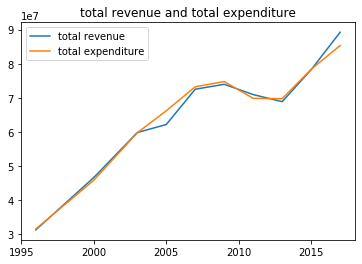

In [4]:
plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'TOTAL_REVENUE'],
    label='total revenue'
    )

plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'TOTAL_EXPENDITURE'],
    label='total expenditure'
    )

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

__3) In your chosen state, which of the lessons are the students more successful, math or reading?__

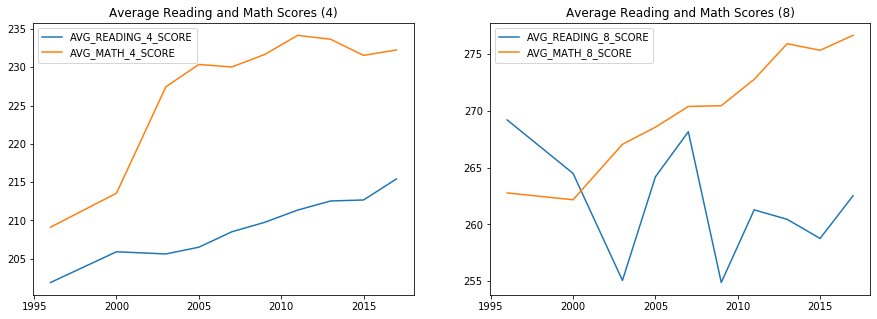

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'AVG_READING_4_SCORE'],
    label='AVG_READING_4_SCORE'
    )
plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'AVG_MATH_4_SCORE'],
    label='AVG_MATH_4_SCORE'
    )
plt.title("Average Reading and Math Scores (4)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'AVG_READING_8_SCORE'],
    label='AVG_READING_8_SCORE'
    )
plt.plot(
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'YEAR'],
    education_df.loc[education_df['STATE'] == 'CALIFORNIA', 'AVG_MATH_8_SCORE'],
    label='AVG_MATH_8_SCORE'
    )
plt.title("Average Reading and Math Scores (8)")

plt.legend()
plt.show()

Visually demonstrated above, students are more successful at math in California.

In [6]:
print("difference between reading and math scores (4)")
difference_4 = education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"]
print(difference_4)
print("difference between reading and math scores (8)")
difference_8 = education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"]
print(difference_8)

difference between reading and math scores (4)
213     -7.216492
420     -7.648537
576    -21.822545
680    -23.854931
784    -21.511905
891    -21.912522
997    -22.806357
1101   -21.108497
1203   -18.871396
1451   -16.841127
dtype: float64
difference between reading and math scores (8)
213      6.424972
420      2.323040
576    -11.976121
680     -4.373619
784     -2.222356
891    -15.553342
997    -11.484551
1101   -15.453063
1203   -16.556305
1451   -14.117570
dtype: float64


This is confirmed, statistically.

__4) What are the distributions of the math and reading scores in the sample?__

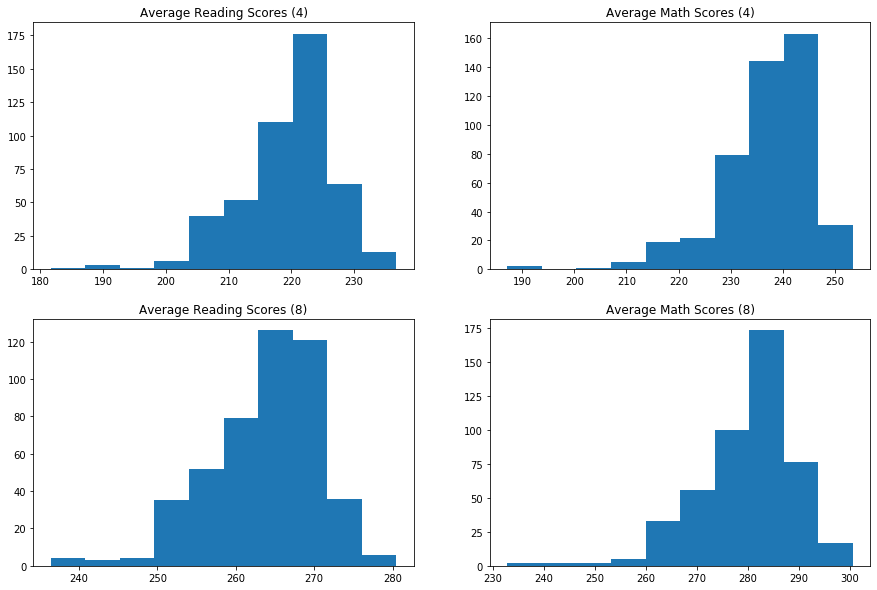

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Average Reading Scores (4)")


plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Average Math Scores (4)")


plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Average Reading Scores (8)")


plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("Average Math Scores (8)")


plt.show()

None of the distributions are normal, due a left skew in scores for both reading and writing. The average of the scores are lower than the median.

__5) Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.__

In [17]:
'''
Since, in the begginning of this solution notebook we filled in the 
missing values and then dropped the rows that have missing values, 
we need to load our dataset once again to answer this question:
'''

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

Text(0.5, 1.0, 'Histogram of Reading 8 Score (interpolate)')

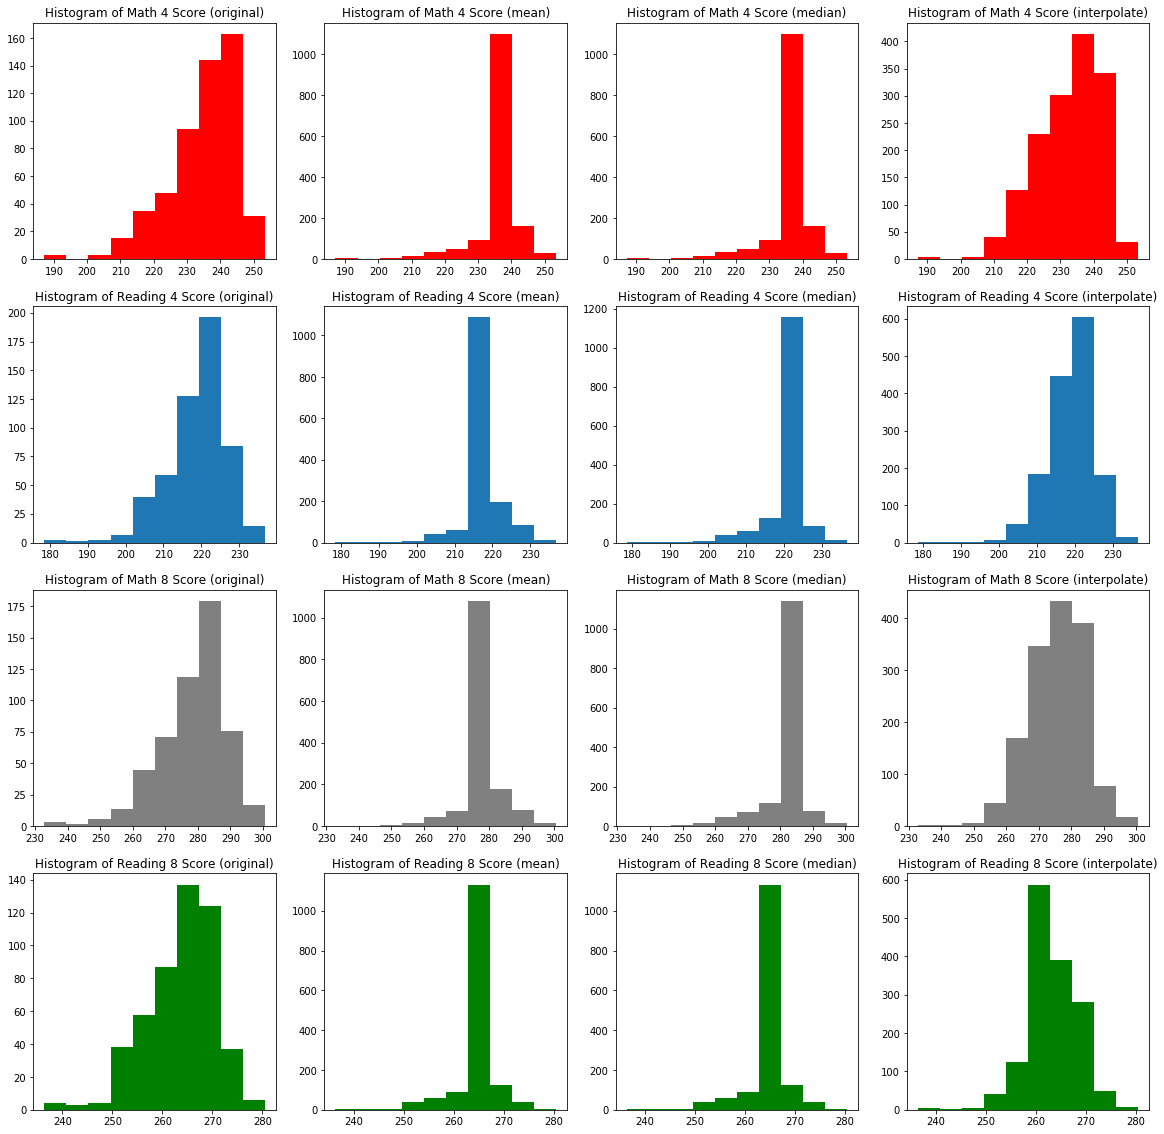

In [29]:
#will be using pandas.DataFrame.dropna() to delete missing values
# will be using pandas.DataFrame.fillna() to fill in missing values
#with mean, median
#and will be using pandas.DataFrame.interpolate() (default is linear interpolation)

plt.figure(figsize=(20,20))




#MATH 4 SCORES

#Original
plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna(), color='red')
plt.title('Histogram of Math 4 Score (original)')

#Mean
plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()), color='red')
plt.title('Histogram of Math 4 Score (mean)')

#Median
plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()), color='red')
plt.title('Histogram of Math 4 Score (median)')

#Interpolate
plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.interpolate()), color='red')
plt.title('Histogram of Math 4 Score (interpolate)')




#READING 4 SCORES

#Original
plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title('Histogram of Reading 4 Score (original)')

#Mean
plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title('Histogram of Reading 4 Score (mean)')

#Median
plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title('Histogram of Reading 4 Score (median)')

#Interpolate
plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.interpolate()))
plt.title('Histogram of Reading 4 Score (interpolate)')





#MATH 8 SCORES

#Original
plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna(), color='gray')
plt.title('Histogram of Math 8 Score (original)')

#Mean
plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()), color='gray')
plt.title('Histogram of Math 8 Score (mean)')

#Median
plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()), color='gray')
plt.title('Histogram of Math 8 Score (median)')

#Interpolate
plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.interpolate()), color='gray')
plt.title('Histogram of Math 8 Score (interpolate)')




#READING 8 SCORES

#Original
plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna(), color='green')
plt.title('Histogram of Reading 8 Score (original)')

#Mean
plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()), color='green')
plt.title('Histogram of Reading 8 Score (mean)')

#Median
plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()), color='green')
plt.title('Histogram of Reading 8 Score (median)')

#Interpolate
plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.interpolate()), color='green')
plt.title('Histogram of Reading 8 Score (interpolate)')

How missing values are filled in has a substantial impact on the distrbutions of variables. Filling in the missing values with the mean or median proved to have the strongest effect, due to a lot of missing data. 

Therefore filling in the missing values using interpolation, or simply discarding them, appears to be the best method in this instance.